In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_excel(r"C:\Users\SurfacePro\Desktop\Project1\Online Retail.xlsx")

In [3]:
df = pd.DataFrame(df)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df = df.replace("", pd.NA)
df = df.dropna()

In [5]:
df["InvoiceNo"] = df["InvoiceNo"].astype(str)
df = df[~df['InvoiceNo'].str.startswith('C')]
df.head()
df.info()

<class 'pandas.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  str           
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[us]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  str           
dtypes: datetime64[us](1), float64(2), int64(1), object(2), str(2)
memory usage: 27.3+ MB


In [6]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.info()

<class 'pandas.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  str           
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[us]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  str           
dtypes: datetime64[us](1), float64(2), int64(1), object(2), str(2)
memory usage: 27.3+ MB


In [7]:
df['Sales'] = df['UnitPrice'] * df['Quantity']

sales_by_country = df.groupby('Country')['Sales'].sum().reset_index()

sales_by_country = sales_by_country.sort_values(by='Sales', ascending=False)

sales_by_country
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [8]:
df['Hour'] = df['InvoiceDate'].dt.hour
df['day_of_week'] = df['InvoiceDate'].dt.day_name()

peak_hour = df.groupby('Hour')['Sales'].sum().idxmax()

peak_day = df.groupby('day_of_week')['Sales'].sum().idxmax()

top_spenders = df.groupby('CustomerID')['Sales'].sum().nlargest(5)

print(top_spenders)
print(f"Most purchases happen at {peak_hour}:00 on {peak_day}s.")

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
Name: Sales, dtype: float64
Most purchases happen at 12:00 on Thursdays.


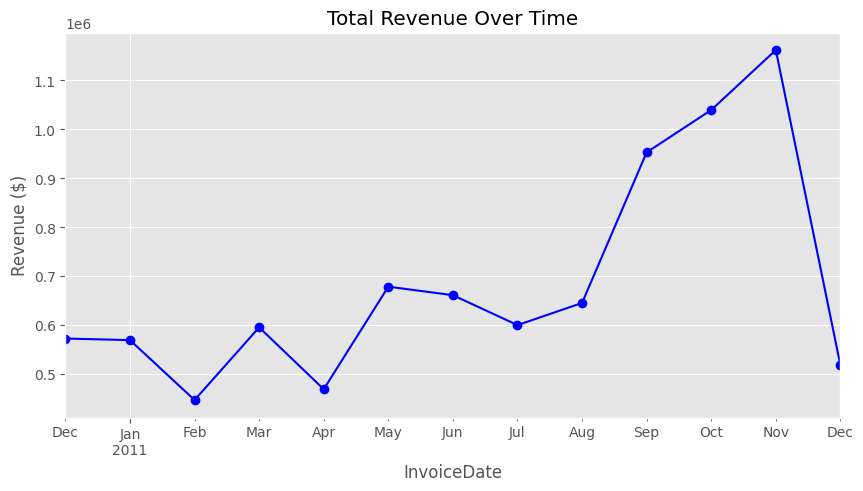

In [9]:
plt.figure(figsize=(10, 5))
df.set_index('InvoiceDate').resample('ME')['Sales'].sum().plot(kind='line', marker='o', color='blue')
plt.title('Total Revenue Over Time')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()

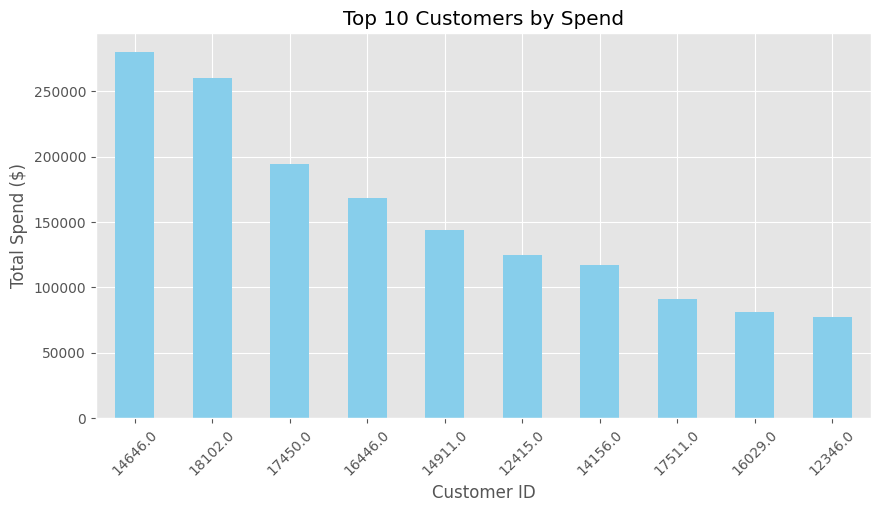

In [40]:
plt.figure(figsize=(10, 5))
top_customers = df.groupby('CustomerID')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Customers by Spend')
plt.ylabel('Total Spend ($)')
plt.xlabel('Customer ID')
plt.xticks(rotation=45)
plt.show()

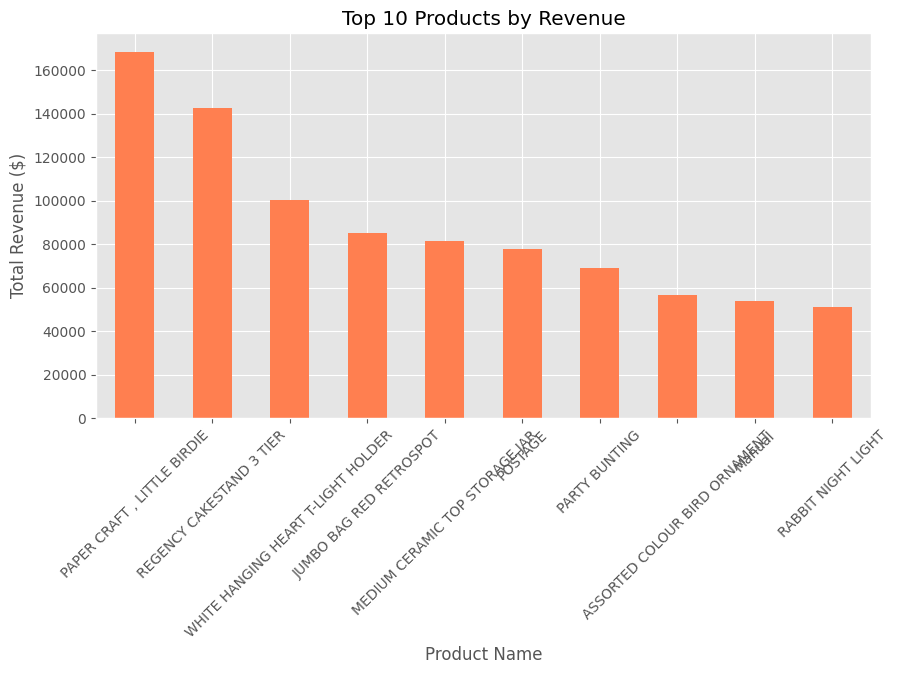

In [10]:
plt.figure(figsize=(10, 5))
top_products = df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='coral')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.show()

In [11]:
now = df['InvoiceDate'].max() + pd.Timedelta(days=1)
customer_summary = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,
    'CustomerID': 'count',             
    'Sales': 'sum'                        
})

customer_summary.columns = ['recency', 'frequency', 'monetary']

customer_summary = customer_summary.reset_index()
customer_summary

,CustomerID,recency,frequency,monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40
...,...,...,...,...
4334,18280.0,278,10,180.60
4335,18281.0,181,7,80.82
4336,18282.0,8,12,178.05
4337,18283.0,4,756,2094.88


In [12]:
customer_summary["Churned"] = np.where(customer_summary["recency"] > 90, 1, 0)
customer_summary

,CustomerID,recency,frequency,monetary,Churned
0,12346.0,326,1,77183.60,1
1,12347.0,2,182,4310.00,0
2,12348.0,75,31,1797.24,0
3,12349.0,19,73,1757.55,0
4,12350.0,310,17,334.40,1
...,...,...,...,...,...
4334,18280.0,278,10,180.60,1
4335,18281.0,181,7,80.82,1
4336,18282.0,8,12,178.05,0
4337,18283.0,4,756,2094.88,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [14]:
customer_summary["AvgOrderValue"] = customer_summary["monetary"] / customer_summary["frequency"]

X = customer_summary[["frequency", "monetary", "AvgOrderValue"]]
Y = customer_summary["Churned"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)
log_preds = log_model.predict(X_test_scaled)

print("--- Logistic Regression ---")
print(f"Acuracy: {accuracy_score(Y_test, log_preds):.2f}")

--- Logistic Regression ---
Acuracy: 0.35


C:\Users\SurfacePro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [16]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
rf_preds = rf_model.predict(X_test)

print("\n--- Random Forest ---")
print(f"Accuracy: {accuracy_score(Y_test, rf_preds):.2f}")
print(classification_report(Y_test, rf_preds))


--- Random Forest ---
Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.73      0.85      0.78       569
           1       0.58      0.39      0.46       299

    accuracy                           0.69       868
   macro avg       0.65      0.62      0.62       868
weighted avg       0.68      0.69      0.67       868



In [17]:
customer_summary["churn_probability"] = rf_model.predict_proba(X)[:,1]
at_risk = customer_summary.sort_values(by='churn_probability', ascending=False)
print(at_risk)

      CustomerID  recency  frequency  monetary  Churned  AvgOrderValue  \
2735     16078.0      284          1     79.20        1      79.200000   
2791     16148.0      296          1     76.32        1      76.320000   
4210     18113.0      369          1     76.32        1      76.320000   
451      12929.0      312          8    117.85        1      14.731250   
4035     17871.0      205         10    155.90        1      15.590000   
...          ...      ...        ...       ...      ...            ...   
1046     13756.0        2        142   5189.52        0      36.545915   
1076     13804.0       31        137   2635.79        0      19.239343   
1070     13798.0        1        349  37153.85        0     106.458023   
10       12357.0       33        131   6207.67        0      47.386794   
1153     13901.0       72        149   2867.20        0      19.242953   

      churn_probability  
2735                1.0  
2791                1.0  
4210                1.0  
451    

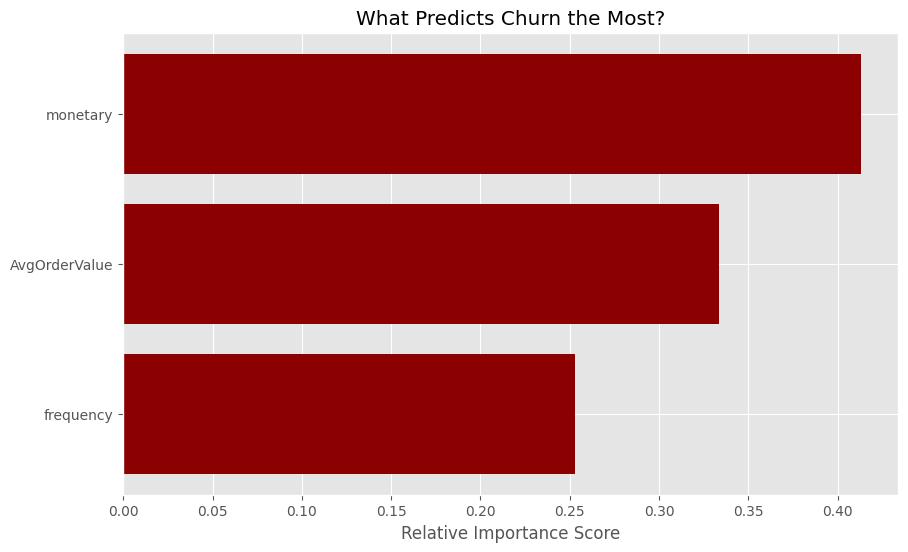

In [18]:
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("What Predicts Churn the Most?")
plt.barh(range(len(indices)), importances[indices], color="darkred", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance Score")
plt.show()

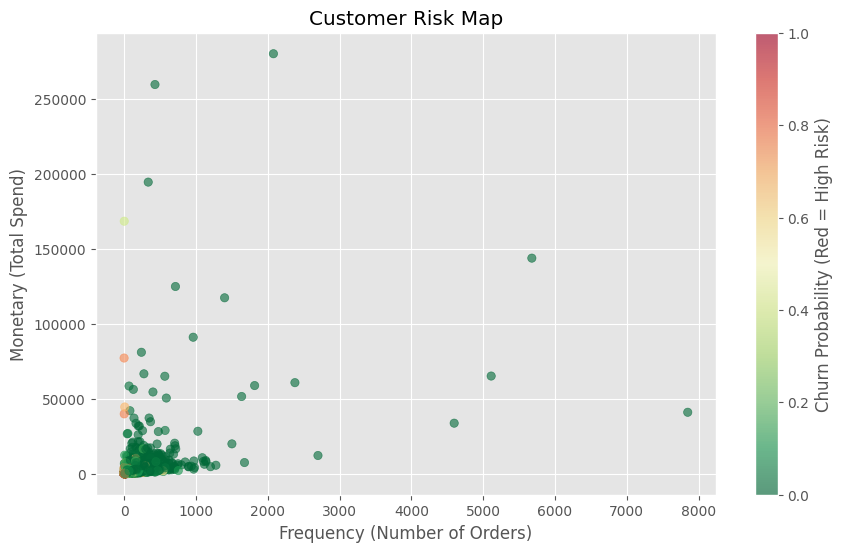

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(customer_summary["frequency"], 
            customer_summary["monetary"],
            c = customer_summary['churn_probability'], 
            cmap="RdYlGn_r", alpha=0.6)
plt.colorbar(label= 'Churn Probability (Red = High Risk)')
plt.title("Customer Risk Map")
plt.xlabel("Frequency (Number of Orders)")
plt.ylabel("Monetary (Total Spend)")
plt.show()

In [20]:
customer_summary["churn_probability"] = rf_model.predict_proba(X)[:, 1]
high_risk_customers = customer_summary[
    (customer_summary['churn_probability'] > 0.5) & 
    (customer_summary['Churned'] == 0)
].sort_values(by='churn_probability', ascending=False)
high_risk_customers.head(50).to_excel("high_priority_at_risk_customers.xlsx", index=False)
print("Priority list generated: high_priority_at_risk_customers.xlsx")

Priority list generated: high_priority_at_risk_customers.xlsx
